In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

## Scenario 1

In [2]:
FairCoin = Die(['H','T'])
FairGame = Game([FairCoin, FairCoin, FairCoin])
FairGame.play_the_game(1000)
FairAnalyzer = Analyzer(FairGame)
FairJackpots = FairAnalyzer.jackpot()

,Die 1,Die 2,Die 3
Roll Number,,,
2,H,H,H
7,T,T,T
8,H,H,H
11,H,H,H
17,T,T,T
...,...,...,...
989,H,H,H
991,T,T,T
992,T,T,T


255


In [3]:
UnfairCoin1 = Die(['H','T'])
UnfairCoin1.change_weight("H",5)
UnfairGame = Game([FairCoin, FairCoin, UnfairCoin1])
UnfairGame.play_the_game(1000)
UnfairAnalyzer = Analyzer(UnfairGame)
UnfairJackpots = UnfairAnalyzer.jackpot()

,Die 1,Die 2,Die 3
Roll Number,,,
1,H,H,H
2,H,H,H
5,H,H,H
8,H,H,H
12,H,H,H
...,...,...,...
992,H,H,H
995,H,H,H
996,H,H,H


241


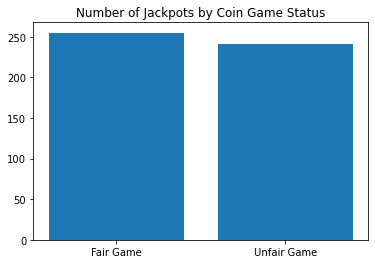

In [4]:
name_of_game = ['Fair Game', 'Unfair Game']
game_result = [FairAnalyzer.number_of_jackpots, UnfairAnalyzer.number_of_jackpots]
game_result
plt.bar(name_of_game,game_result)
plt.title('Number of Jackpots by Coin Game Status')
plt.show()

## Scenario 2

In [5]:
FairDie = Die([1,2,3,4,5,6])
UnfairDie1 = Die([1,2,3,4,5,6])
UnfairDie2 = Die([1,2,3,4,5,6])
UnfairDie1.change_weight(6,5)
UnfairDie2.change_weight(1,5)

In [6]:
FairDieSet = ([FairDie, FairDie, FairDie, FairDie, FairDie])
FairDiceGame = Game(FairDieSet)
FairDiceGame.play_the_game(10000)
FairDiceAnalyzer = Analyzer(FairDiceGame)
FairDiceJackpots = FairDiceAnalyzer.jackpot()
FairDiceAnalyzer.combos()
Top10Fair = FairDiceAnalyzer.combonations.head(10)
Top10Fair

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
1307,5,5,5,5,5


1


n
0 1 2 3 4     
1 2 4 5 6  191
    3 4 5  161
2 3 4 5 6  155
1 3 4 5 6  147
  2 3 5 6  141
      4 6  133
    2 4 5  103
  1 3 4 6  100
3 4 4 5 6   92
1 3 5 6 6   87

In [7]:
top_10_fair = Top10Fair.index.to_list()
top_10_fair_occurences = Top10Fair['n'].to_list()
top_10_fair_occurences

[191, 161, 155, 147, 141, 133, 103, 100, 92, 87]

Text(0.5, 1.0, 'Most Common Unique Combinations for 10000 Dice Rolls in Fair Game')

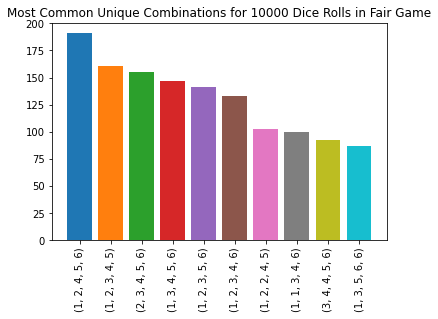

In [8]:
x_axis = np.array(top_10_fair)
y_axis = top_10_fair_occurences
for i in zip(range(len(top_10_fair))):
    plt.bar(i, top_10_fair_occurences[i[0]]);
plt.xticks(range(10), top_10_fair, rotation = 'vertical'); plt.title('Most Common Unique Combinations for 10000 Dice Rolls in Fair Game')

In [11]:
UnfairDieSet = ([UnfairDie1, UnfairDie1, UnfairDie2, FairDie, FairDie])
UnfairDiceGame = Game(UnfairDieSet)
UnfairDiceGame.play_the_game(10000)
UnfairDiceAnalyzer = Analyzer(UnfairDiceGame)
UnfairDiceJackpots = UnfairDiceAnalyzer.jackpot()
UnfairDiceAnalyzer.combos()
Top10Unfair = UnfairDiceAnalyzer.combonations.head(10)
Top10Unfair

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
3521,2,2,2,2,2
3618,1,1,1,1,1
3835,6,6,6,6,6
4548,6,6,6,6,6
6877,4,4,4,4,4
7588,2,2,2,2,2
9014,6,6,6,6,6
9554,6,6,6,6,6


8


n
0 1 2 3 4     
1 4 5 6 6  243
  2 5 6 6  206
    3 6 6  206
    4 6 6  205
  3 4 5 6  188
      6 6  184
  2 3 4 6  182
  3 5 6 6  177
  2 4 5 6  168
    3 5 6  162

In [12]:
top_10_unfair = Top10Unfair.index.to_list()
top_10_unfair_occurences = Top10Unfair['n'].to_list()

Text(0.5, 1.0, 'Most Common Unique Combinations for 10000 Dice Rolls in Unfair Game')

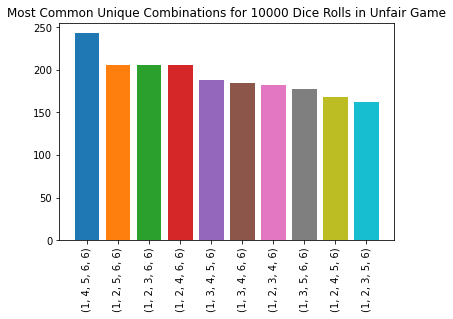

In [13]:
unfair_x_axis = np.array(top_10_unfair)
unfair_y_axis = top_10_unfair_occurences
for i in zip(range(len(top_10_unfair))):
    plt.bar(i, top_10_unfair_occurences[i[0]]);
plt.xticks(range(10), top_10_unfair, rotation = 'vertical'); plt.title('Most Common Unique Combinations for 10000 Dice Rolls in Unfair Game')

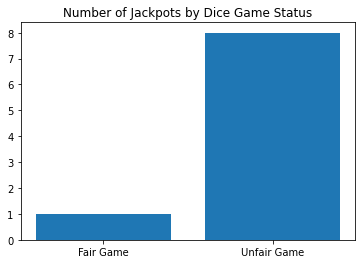

In [14]:
name_of_dice_game = ['Fair Game', 'Unfair Game']
dice_game_result = [FairDiceAnalyzer.number_of_jackpots, UnfairDiceAnalyzer.number_of_jackpots]
plt.bar(name_of_dice_game,dice_game_result)
plt.title('Number of Jackpots by Dice Game Status')
plt.show()

In [15]:
pd.set_option('display.max_rows', 500)

## Scenario 3

In [16]:
import string
Alphabet_string = string.ascii_lowercase[:26]
Alphabet_list = [i for i in Alphabet_string]
alphabet_die = Die([i for i in Alphabet_string])
weights_df = pd.DataFrame({"Letter": Alphabet_list, "Weighted": [8.4966,2.072,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,.2902,1.7779,0.2722]})
Weights = weights_df['Weighted']
alphabet_die.weightslist = [Weights[i] for i in range(len(alphabet_die.weightslist))]
Alphabets_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])
Alphabets_game.play_the_game(1000)

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll Number,,,,,
1,s,c,s,s,r
2,h,n,t,u,e
3,b,e,a,g,c
4,r,e,r,s,v
5,o,i,i,h,i
...,...,...,...,...,...
996,s,s,l,e,d
997,r,n,o,a,e
998,e,o,e,e,l


In the interest of time, I looked through just 100 rows, and found 2 combinations that could be considered actual English words. A rate of 2% sounds about right.